## Breast Cancer Diagnostic - Kaggle

- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### Attribute Information

#### 1) ID number

#### 2) Diagnosis

- M = malignant
- B = benign

#### 3-32) Features (Mean, Std Err, Worst/Largest)

Ten real-valued features are computed for each cell nucleus:

- a) **radius** (mean of distances from center to points on the perimeter)
- b) **texture** (standard deviation of gray-scale values)
- c) **perimeter**
- d) **area**
- e) **smoothness** (local variation in radius lengths)
- f) **compactness** (perimeter^2 / area - 1.0)
- g) **concavity** (severity of concave portions of the contour)
- h) **concave points** (number of concave portions of the contour)
- i) **symmetry**
- j) **fractal dimension** ("coastline approximation" - 1)

The **mean**, **standard error** and **"worst" or largest** (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### Observations

- All feature values are recoded with four significant digits.
- Missing attribute values: none.
- Class distribution: 357 benign, 212 malignant.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
sns.set(style="white", color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv('breast/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [4]:
# remove unnamed 32th column
data.drop(data.columns[32], axis=1, inplace=True)

# save identifications
ids = data['id']

# remove unnecessary id column
data.drop(['id'], axis=1, inplace=True)

In [5]:
data.shape

(569, 31)

In [6]:
data.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [7]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [9]:
# null values checking
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# describe numerical features
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,5.69e+02,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,6.28e-02,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,7.06e-03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,5.00e-02,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,5.77e-02,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,6.15e-02,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,6.61e-02,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,9.74e-02,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [11]:
# describe categorical features
data.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [12]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [15]:
data.iloc[:,1:].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08


In [16]:
# scale numeric values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.10,-2.07,1.27,0.98,1.57,3.28,2.65,2.53,2.22e+00,...,1.89,-1.36,2.30,2.00,1.31,2.62,2.11,2.30,2.75,1.94
1,M,1.83,-0.35,1.69,1.91,-0.83,-0.49,-0.02,0.55,1.39e-03,...,1.81,-0.37,1.54,1.89,-0.38,-0.43,-0.15,1.09,-0.24,0.28
2,M,1.58,0.46,1.57,1.56,0.94,1.05,1.36,2.04,9.40e-01,...,1.51,-0.02,1.35,1.46,0.53,1.08,0.85,1.96,1.15,0.20
3,M,-0.77,0.25,-0.59,-0.76,3.28,3.40,1.92,1.45,2.87e+00,...,-0.28,0.13,-0.25,-0.55,3.39,3.89,1.99,2.18,6.05,4.94
4,M,1.75,-1.15,1.78,1.83,0.28,0.54,1.37,1.43,-9.56e-03,...,1.30,-1.47,1.34,1.22,0.22,-0.31,0.61,0.73,-0.87,-0.40


In [ ]:
# bin continuous data into intervals
# TODO: check whether this process is necessary
'''
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretizer.fit(X)
Xt = discretizer.transform(X)
'''

# see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html

In [19]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(data.iloc[:,1:])

# The explained variance tells you how much information (variance) can be
# attributed to each of the principal components.
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

# see https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
# see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


In [23]:
print(sum(pca.explained_variance_ratio_))
print(len(pca.explained_variance_))

1.0000000000000002
30


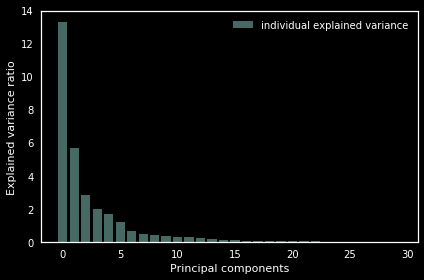

In [21]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [29]:
# We can see that the first 6 components retain more than 88% of the data.
print(sum(pca.explained_variance_ratio_[:6]) * 100)

88.75879635669057


In [34]:
pca = PCA(.88)
pca.fit_transform(data.iloc[:,1:])

# The explained variance tells you how much information (variance) can be
# attributed to each of the principal components.
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224]
6
0.8875879635669057


In [39]:
X = pca.transform(data.iloc[:,1:])
print(type(X), len(X), '\n', X)

<class 'numpy.ndarray'> 569 
 [[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


In [50]:
#data2 = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
data2 = pd.DataFrame(np.c_[data['diagnosis'], X], columns=['diagnosis','pc1','pc2','pc3','pc4','pc5','pc6'])
data2.head()

,diagnosis,pc1,pc2,pc3,pc4,pc5,pc6
0,M,9.2,1.9,-1.1,3.6,-1.2,1.4
1,M,2.4,-3.8,-0.53,1.1,0.62,0.029
2,M,5.7,-1.1,-0.55,0.91,-0.18,0.54
3,M,7.1,10,-3.2,0.15,-3,3.1
4,M,3.9,-1.9,1.4,2.9,0.55,-1.2


In [49]:
data2.corr()

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.00e+00,4.25e-16,-7.64e-17,2.84e-16,-1.97e-16,-8.38e-17
pc2,4.25e-16,1.00e+00,-3.46e-17,-2.33e-16,-3.22e-16,1.17e-17
pc3,-7.64e-17,-3.46e-17,1.00e+00,-2.91e-17,-8.37e-16,-1.45e-16
pc4,2.84e-16,-2.33e-16,-2.91e-17,1.00e+00,-4.29e-16,-2.29e-17
pc5,-1.97e-16,-3.22e-16,-8.37e-16,-4.29e-16,1.00e+00,-3.10e-16
pc6,-8.38e-17,1.17e-17,-1.45e-16,-2.29e-17,-3.10e-16,1.00e+00


In [ ]:
# analyze correlation between features

sns.heatmap(data=data2.corr(), annot=True, cmap="PiYG")

#fig, ax = plt.subplots(figsize=(17, 17))
#sns.heatmap(data=data.corr().round(2), annot=True, cmap="PiYG", ax=ax)

# see https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

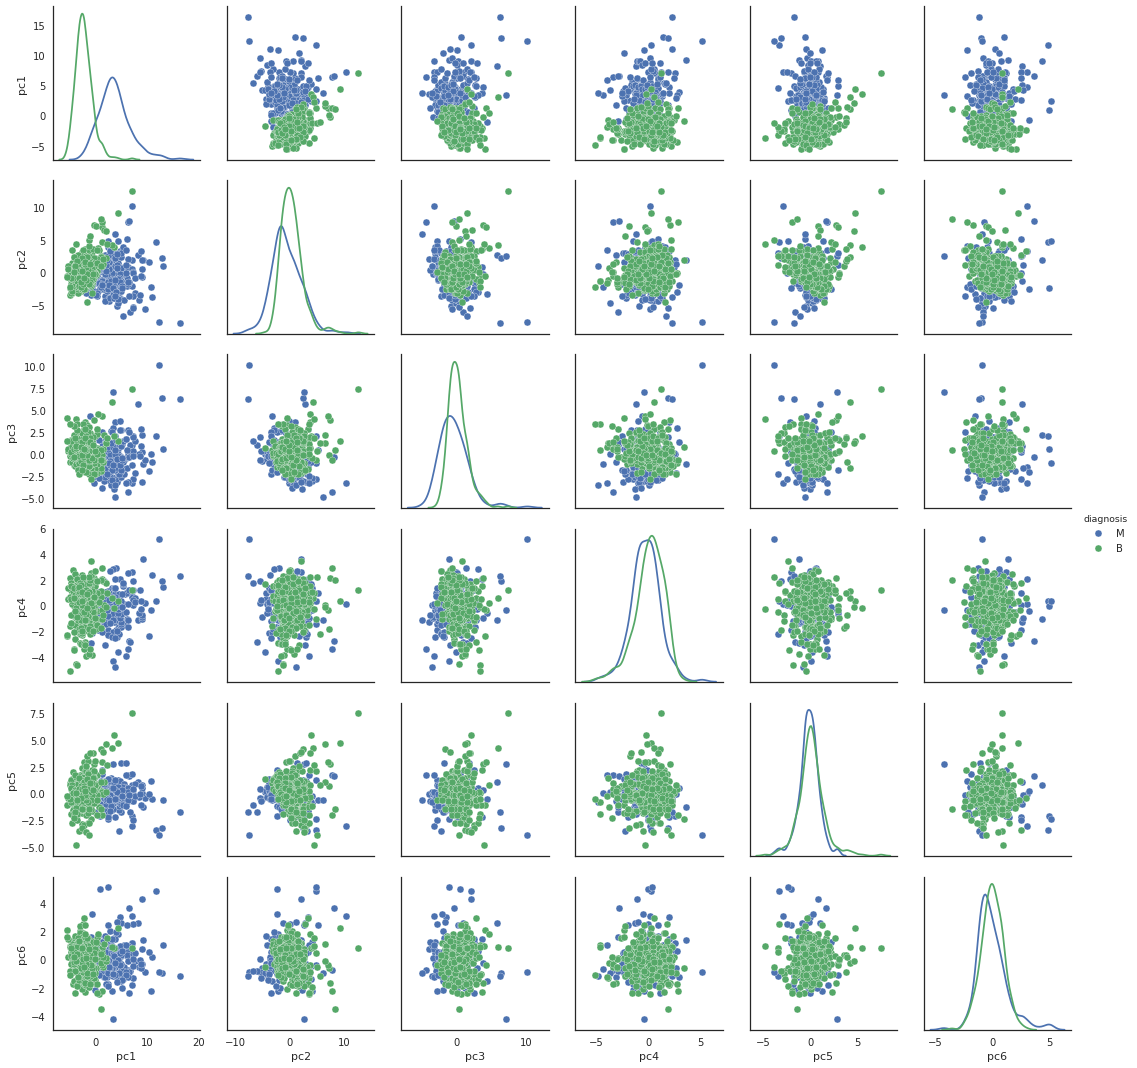

In [51]:
sns.pairplot(data=data2, hue='diagnosis', diag_kind='kde')

In [ ]:
# pair plot diagnosis + 10 features (mean)
sns.pairplot(data=data.iloc[:,0:11], hue='diagnosis', diag_kind='kde')

In [ ]:
# pair plot diagnosis + 10 features (std error)
sns.pairplot(data=data.iloc[:,np.append([0],np.arange(11,21))], hue='diagnosis', diag_kind='kde')

In [ ]:
# pair plot diagnosis + 10 features (worst/largest)
sns.pairplot(data=data.iloc[:,np.append([0],np.arange(21,31))], hue='diagnosis', diag_kind='kde')

In [ ]:
sns.jointplot(x='radius_mean', y='concave points_mean', data=data, size=5)

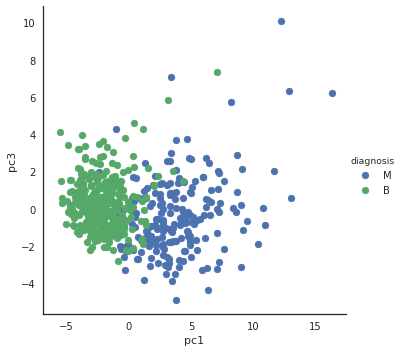

In [54]:
sns.FacetGrid(data2, hue='diagnosis', size=5) \
   .map(plt.scatter, 'pc1', 'pc3') \
   .add_legend()

In [ ]:
sns.FacetGrid(data, hue='diagnosis', size=5) \
   .map(plt.scatter, 'radius_mean', 'concave points_mean') \
   .add_legend()

In [ ]:
# selected features (mean): 1 3 4 7 8
data.columns[[1, 3, 4, 7, 8]]

In [ ]:
sns.boxplot(x='diagnosis', y='radius_mean', data=data)

In [ ]:
sns.FacetGrid(data, col='diagnosis')\
   .map(plt.hist, 'radius_mean', bins=20)

In [ ]:
sns.FacetGrid(data, hue='diagnosis')\
   .map(plt.hist, 'radius_mean', alpha=.5, bins=20)\
   .add_legend()

In [ ]:
sns.FacetGrid(data, hue='diagnosis')\
   .map(plt.hist, 'concave points_mean', alpha=.5, bins=20)\
   .add_legend()

In [ ]:
data[data.columns[[0, 1, 3, 4, 7, 8]]].boxplot(by='diagnosis', figsize=(12,6))

In [68]:
# select the features
#X = data[data.columns[[1, 3, 4, 7, 8]]] # use only selected 5 features
X = data.iloc[:,1:] # use all numeric features
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.10,-2.07,1.27,0.98,1.57,3.28,2.65,2.53,2.22e+00,2.26,...,1.89,-1.36,2.30,2.00,1.31,2.62,2.11,2.30,2.75,1.94
1,1.83,-0.35,1.69,1.91,-0.83,-0.49,-0.02,0.55,1.39e-03,-0.87,...,1.81,-0.37,1.54,1.89,-0.38,-0.43,-0.15,1.09,-0.24,0.28
2,1.58,0.46,1.57,1.56,0.94,1.05,1.36,2.04,9.40e-01,-0.40,...,1.51,-0.02,1.35,1.46,0.53,1.08,0.85,1.96,1.15,0.20
3,-0.77,0.25,-0.59,-0.76,3.28,3.40,1.92,1.45,2.87e+00,4.91,...,-0.28,0.13,-0.25,-0.55,3.39,3.89,1.99,2.18,6.05,4.94
4,1.75,-1.15,1.78,1.83,0.28,0.54,1.37,1.43,-9.56e-03,-0.56,...,1.30,-1.47,1.34,1.22,0.22,-0.31,0.61,0.73,-0.87,-0.40


In [69]:
y = data.diagnosis
y.tail()

564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix #, roc_auc_score

In [71]:
# separate data for training and testing

print('original shapes:', X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('splitted shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

original shapes: (569, 30) (569,)
splitted shapes: (398, 30) (171, 30) (398,) (171,)


In [72]:
# train model using SVM algorithm

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

print('model score:', model.score(X_test, y_test))

y_pred = model.predict(X_test)

print('accuracy score:', accuracy_score(y_pred, y_test))
print('confusion matrix:\n', confusion_matrix(y_pred, y_test))

model score: 0.9707602339181286
accuracy score: 0.9707602339181286
confusion matrix:
 [[105   2]
 [  3  61]]


In [73]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [74]:
# spot check algorithms
models = []
models.append(('Support Vector Machines (SVM)', SVC()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('K-Nearest Neighbours (3)', KNeighborsClassifier(n_neighbors=3)))
models.append(('K-Nearest Neighbours (7)', KNeighborsClassifier(n_neighbors=7)))
models.append(('K-Nearest Neighbours (11)', KNeighborsClassifier(n_neighbors=11)))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Random Forest (10)', RandomForestClassifier(n_estimators=10)))
models.append(('Random Forest (100)', RandomForestClassifier(n_estimators=100)))
models.append(('Gaussian Naïve Bayes', GaussianNB()))
models.append(('Perceptron (5)', Perceptron(max_iter=5)))
models.append(('Perceptron (10)', Perceptron(max_iter=10)))
models.append(('Perceptron (50)', Perceptron(max_iter=50)))
models.append(('Stochastic Gradient Decent (SGD)', SGDClassifier(max_iter=50)))
models.append(('Linear SVC', LinearSVC()))

In [75]:
names = []
scores = []
falnegs = []

best_model = None
highest_score = 0.0
false_negatives = None

for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_pred, y_test)
    tn, fp, fn, tp = cm.ravel()
    print(name, '\n', cm, '\n')

    names.append(name)
    scores.append(score)
    falnegs.append(fn)

    if ((score > highest_score) or (score == highest_score and fn < false_negatives)):
        best_model = model
        highest_score = score
        false_negatives = fn
        
print('Best model:', best_model, '\n[Score: %.3f, False Negatives: %d]' % (highest_score, false_negatives))

Support Vector Machines (SVM) 
 [[105   2]
 [  3  61]] 

Logistic Regression 
 [[106   1]
 [  2  62]] 

Decision Tree 
 [[100   3]
 [  8  60]] 

K-Nearest Neighbours (3) 
 [[105   4]
 [  3  59]] 

K-Nearest Neighbours (7) 
 [[105   4]
 [  3  59]] 

K-Nearest Neighbours (11) 
 [[106   5]
 [  2  58]] 

Random Forest 
 [[107   4]
 [  1  59]] 

Random Forest (10) 
 [[107   4]
 [  1  59]] 

Random Forest (100) 
 [[107   4]
 [  1  59]] 

Gaussian Naïve Bayes 
 [[103   6]
 [  5  57]] 

Perceptron (5) 
 [[104   2]
 [  4  61]] 

Perceptron (10) 
 [[108   1]
 [  0  62]] 

Perceptron (50) 
 [[105   2]
 [  3  61]] 

Stochastic Gradient Decent (SGD) 
 [[105   1]
 [  3  62]] 

Linear SVC 
 [[105   1]
 [  3  62]] 

Best model: Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=10, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False) 
[Score: 0.994, False Negatives: 0]


In [76]:
results = pd.DataFrame({'Model': names, 'Score': scores, 'FN': falnegs})
results.sort_values(by=['Score', 'FN'], ascending=[False, True])

,Model,Score,FN
11,Perceptron (10),0.99,0
1,Logistic Regression,0.98,2
13,Stochastic Gradient Decent (SGD),0.98,3
14,Linear SVC,0.98,3
6,Random Forest,0.97,1
7,Random Forest (10),0.97,1
8,Random Forest (100),0.97,1
0,Support Vector Machines (SVM),0.97,3
12,Perceptron (50),0.97,3
10,Perceptron (5),0.96,4


In [77]:
# so, let's consider the best algorithm found!
model = best_model

model.fit(X_train, y_train)
score = model.score(X, y)
print('Final score:', score)

y_pred = model.predict(X)
print('Confusion matrix:\n', confusion_matrix(y_pred, y), '\n')

Final score: 0.9859402460456942
Confusion matrix:
 [[353   4]
 [  4 208]] 



In [78]:
submission = pd.DataFrame({
  "ID": ids,
  "Diagnosis": y,
  "Predicted": y_pred,
  "Correct": (y == y_pred).map({True: 1, False: 0})
})
submission.head(10)

,ID,Diagnosis,Predicted,Correct
0,842302,M,M,1
1,842517,M,M,1
2,84300903,M,M,1
3,84348301,M,M,1
4,84358402,M,M,1
5,843786,M,M,1
6,844359,M,M,1
7,84458202,M,M,1
8,844981,M,M,1
9,84501001,M,M,1


In [79]:
# show the incorrectly classified cases

incorrectly = submission[submission["Correct"] == False]

incorrect = len(incorrectly.index)
total_cases = len(submission)
print('Incorrectly classified cases:', incorrect, \
      'of', total_cases, '(%.3f%%)' % (incorrect / total_cases))

incorrectly

Incorrectly classified cases: 8 of 569 (0.014%)


,ID,Diagnosis,Predicted,Correct
40,855167,M,B,0
73,859983,M,B,0
135,868202,M,B,0
157,8711216,B,M,0
225,88143502,B,M,0
297,892189,M,B,0
363,9010872,B,M,0
413,905557,B,M,0


In [81]:
unforgiven_incorrectly = submission.query("Diagnosis == 'M' & Predicted == 'B'")
unforgiven_incorrectly.head()

,ID,Diagnosis,Predicted,Correct
40,855167,M,B,0
73,859983,M,B,0
135,868202,M,B,0
297,892189,M,B,0


In [80]:
submission.to_csv("breast/predicted.csv", index=False)